<a href="https://colab.research.google.com/github/sairam0619/Amazon-user-Segementation/blob/main/Amazon_user_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing data set

In [2]:
dataset = pd.read_csv('Amazon user Segementation.csv')
X = dataset.iloc[:, [2, 4]].values

In [3]:
print(X)

[[ 42  40]
 [ 30  82]
 [ 56   6]
 [ 38  82]
 [ 65  16]
 [ 35  92]
 [ 54  36]
 [ 42  69]
 [ 48  35]
 [ 28  98]
 [ 72   5]
 [ 26  82]
 [ 64   5]
 [ 22 104]
 [ 59  16]
 [ 26  91]
 [ 51  20]
 [ 36  82]
 [ 44  30]
 [ 24  84]
 [ 78  40]
 [ 29 104]
 [ 58  41]
 [ 38  69]
 [ 59  32]
 [ 29  73]
 [ 60  62]
 [ 33  53]
 [ 35  48]
 [ 38  48]
 [ 59  59]
 [ 40  68]
 [ 38  61]
 [ 71  68]
 [ 60  51]
 [ 57  46]
 [ 62  56]
 [ 83  52]
 [ 33  58]
 [ 64  52]
 [ 84  63]
 [ 23  62]
 [ 81  59]
 [ 65  67]
 [ 76  58]
 [ 22  67]
 [ 52  56]
 [ 82  54]
 [ 23  67]
 [ 39  53]
 [ 84  62]
 [ 57  48]
 [ 72  55]
 [ 72  63]
 [ 71  53]
 [ 32  61]
 [ 54  60]
 [ 48  54]
 [ 28  59]
 [ 59  48]
 [ 69  58]
 [ 46  62]
 [ 81  46]
 [ 56  50]
 [ 26  64]
 [ 58  52]
 [ 66  65]
 [ 27  62]
 [ 41  68]
 [ 60  52]
 [ 82  62]
 [ 22  46]
 [ 58  55]
 [ 48  45]
 [ 39  48]
 [ 29  59]
 [ 57  53]
 [ 33  56]
 [ 58  48]
 [ 24  55]
 [ 28  46]
 [ 59  54]
 [ 81  67]
 [ 32  62]
 [ 59  63]
 [ 26  48]
 [ 80  56]
 [ 65  52]
 [ 82  49]
 [ 80  54]
 [ 78  59]

# Optimal number of clusters via Elbow Method

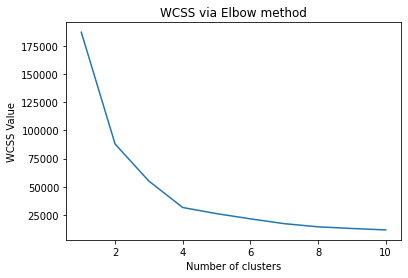

In [4]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

# K Means Model Training on Training set

In [5]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [6]:
print(y_means)

[0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3
 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0
 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1
 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2
 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


# Visualizing Clusters

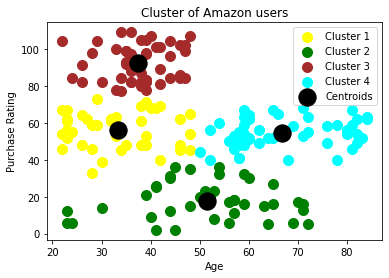

In [8]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()